$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Gm}{\mathbf{G}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Nonlinear Logistic Regression 



Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />


# Nonlinear Extension with Neural Networks

Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 


$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk^\prime}}} &= -\frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))} \Big)}{\partial{w_{gk^\prime}}} \\
   \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  \kappa_{nk}} \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} g_{nk^\prime}(\xv_n) (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \sum_{g=0}^{G} z1_{ng} w_{gk}  }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big(\sum_{k=1}^{K}  t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( \sum_{k=1}^{K} t_{n,k} I_{kk^\prime} - g_{nk^\prime}(\xv_n) \sum_{k=1}^{K} t_{n,k}  \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( t_{n,k^\prime} - g_{nk^\prime}(\xv_n) \Big) z1_{nk^\prime}.
\end{align}
$$

Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Now let us update the weight $\vv$ for the hidden layer. 
For the hidden layer, we repeat this: 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))}  \Big)}{\partial{v_{dg}}} \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \frac{\partial \kappa_{nk}} {\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gl} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} (1 - z_{ng}^2) x1_{nd}.
\end{align}
$$

Again, coverting in matrix form for the hidden weight update,


$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 

## Summary (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm \\
\Gm & = softmax(\Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
\Vm &\leftarrow \Vm + \alpha_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big) \\
\Wm &\leftarrow \Wm + \alpha_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
\Vm &\leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - \Gm) \Wm^\top \odot (1 - \Zm^2) \Big)\\
\Wm &\leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - \Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $\Tm$ is a matrix with indicator variable outputs, <br/>
and $\Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

# Practice

Now, inherit the previous NeuralNetwork class to implement neural network classification. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nn 

ModuleNotFoundError: No module named 'nn'

Let us repeat the previous classification example with nonlinear classification.

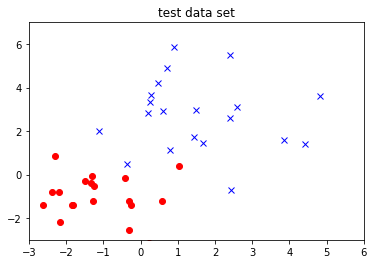

In [2]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [10]:
# Apply Nonlinear Logistic Regression
from imp import reload
reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

clsf = nn.NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [11]:
classes

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.])

In [12]:
Y

array([[  1.00000000e+00,   3.62429239e-24],
       [  1.00000000e+00,   4.49791656e-10],
       [  9.99999998e-01,   2.08859210e-09],
       [  1.00000000e+00,   3.62429232e-24],
       [  2.99307336e-01,   7.00692664e-01],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   3.62429243e-24],
       [  1.00000000e+00,   3.62926450e-24],
       [  1.00000000e+00,   6.36987730e-24],
       [  1.00000000e+00,   3.62429240e-24],
       [  5.99996498e-01,   4.00003502e-01],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   4.48284191e-24],
       [  1.00000000e+00,   3.64360621e-24],
       [  1.00000000e+00,   3.95678934e-24],
       [  1.00000000e+00,   3.67347448e-24],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   3.62429233e-24],
       [  1.00000000e+00,   5.59588219e-18],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.71288265e-23,   1.00000000e+00],
       [  2.19935378e-14,   1.00000000e+00],
       [  

Accuracy:  52.5 %


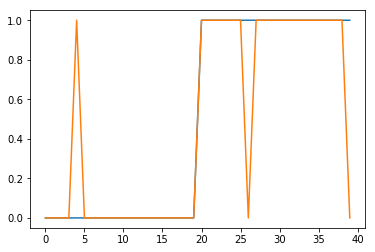

In [17]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

In [18]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')


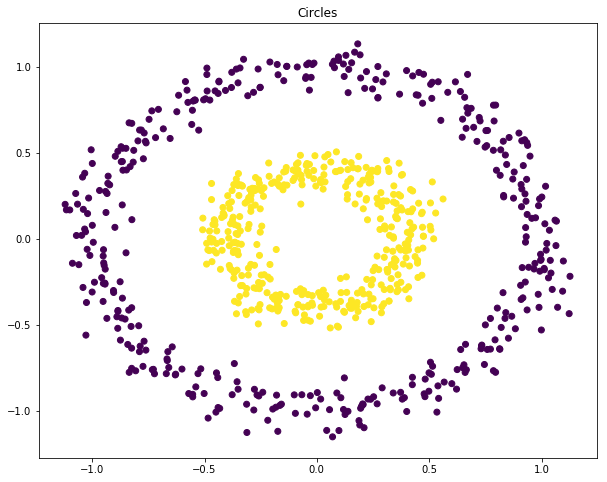

In [31]:
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")


In [69]:
clsf = nn.NeuralNetLogReg([2, 1, 2])
clsf.train(X, T)

# checking the training error only
classes, Y = clsf.use(X)

Accuracy:  100.0 %


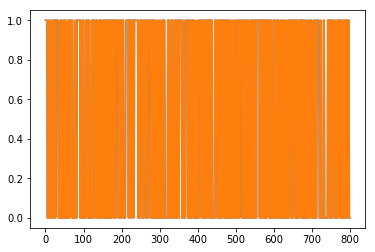

In [62]:
# retrieve labels and plot

plt.plot(T)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(T - classes)) * 100, "%")

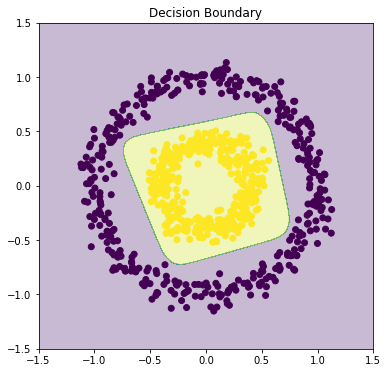

In [63]:
# show me the boundary

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(Xt)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)


In [65]:
from sklearn.datasets import load_iris

data = load_iris()

In [67]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [68]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
data.data.shape

(150, 4)

In [123]:
clsf = nn.NeuralNetLogReg([4, 1, 3])
clsf.train(data.data, data.target)

# checking the training error only
classes, Y = clsf.use(data.data)

Accuracy:  98.6666666667 %


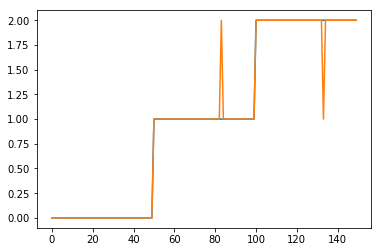

In [124]:
# retrieve labels and plot

plt.plot(data.target)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(data.target - classes)) * 100, "%")

In [125]:
Y

array([[  9.99991385e-01,   8.61541898e-06,   2.16892851e-27],
       [  9.99978241e-01,   2.17593859e-05,   1.73875252e-26],
       [  9.99986146e-01,   1.38544096e-05,   6.30606216e-27],
       [  9.99971064e-01,   2.89362302e-05,   3.29887992e-26],
       [  9.99992127e-01,   7.87333680e-06,   1.77158220e-27],
       [  9.99982124e-01,   1.78759977e-05,   1.11795632e-26],
       [  9.99978766e-01,   2.12335059e-05,   1.64576183e-26],
       [  9.99986703e-01,   1.32968101e-05,   5.75011385e-27],
       [  9.99962956e-01,   3.70441567e-05,   5.74627718e-26],
       [  9.99985191e-01,   1.48093898e-05,   7.32482714e-27],
       [  9.99993245e-01,   6.75457274e-06,   1.25551382e-27],
       [  9.99980827e-01,   1.91733484e-05,   1.30853666e-26],
       [  9.99985342e-01,   1.46575442e-05,   7.15717099e-27],
       [  9.99989996e-01,   1.00044561e-05,   3.03453396e-27],
       [  9.99997699e-01,   2.30076932e-06,   1.11687549e-28],
       [  9.99995299e-01,   4.70117860e-06,   5.5618268

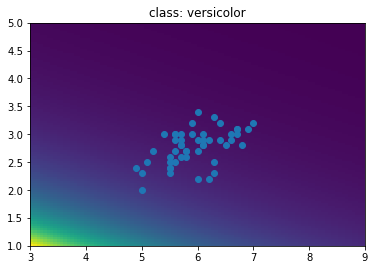

In [126]:
x = np.linspace(3.5, 8, 100)
y = np.linspace(1.5, 5, 100)
xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
Xt = np.hstack((Xt, np.random.rand(*Xt.shape) * 0.001)) # fill random noise for other columns
classes, Y = clsf.use(Xt)

for k in range(3):
    zs = Y[:, k].reshape(xs.shape)

    plt.figure(figsize=(6,6))
    plt.imshow(zs, origin='lower', extent=(3,9,1,5))
    #plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
    plt.title("class: " + data.target_names[k])
    
    plt.scatter(data.data[data.target==k, 0], data.data[data.target==k, 1], marker='o')


In [101]:
import pandas as pd

df = pd.DataFrame(data.data)
df.describe()

0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$


# Reinforcement Learning with Neural Network Function Approximation



So far, we have learned about the reinforcement learning and how we can implement temporal difference learning with tabular function approximation. 
Here, we observed that the table cannot hold all the information when the number of states or actions is very large. 
Not only for the memory, but the time to take until it fills out the cells correctly can matter.
We refer this issue as *generalization*. 
The question that we will discuss is how to generalize to produce a good estimation over unexperienced state space based on the experience from the limited set of the state space.

This kind of generalization is called as *function approximation*. 
For this, we do not reinvent wheels for reinforcement learning. Lots of study in supervised learning already suggested various techniques including artificial neural networks, which we have learned last week. 



## Example problem in continuous state space



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import collections
from copy import deepcopy as copy

from util import Standardizer

In [2]:
class Marble():
    """ 1d marble problem
        
        states: x, dx
        action: action [-1,1]


        |            ___                     |
        |___________|///|____G_______________|
                    <- ->
    """

    def __init__(self,goal=5, **params):
        # len(state) + action (1)
        self.n_state = 2
        self.n_action = 1
        self.Goal = goal
        self.bound = params.pop('bound', [0, 10, -5, 5])
        if len(self.bound) != 4:
             self.bound = self.bound[:2] + [-5, 5]

        self._st_range = np.array([self.bound[:2], self.bound[2:], [-1, 1]]).T
        self.nnNI = self.n_state + 1
        self.goal_width = 1
        
        self._s = [0, 0]

    def init(self, start=None):
        if start is not None:
            self._s = start
        else: 
            self._s = [np.random.randint(self.bound[0], self.bound[1]), 0.]
        return self._s
       
    def get_random_action(self):
        return float(np.random.randint(3) -1) # discrete action

    def get_bound_act(self, a):
        if a[0] > 1:
            return 1
        elif a[0] < -1:
            return -1
        else:
            return a[0]

    def next(self, a) :
        s = self._s
        if isinstance(a, collections.Iterable):
            a = a[0]
        s1 = copy(s)
        dT = 0.1
        s1[0] += dT * s[1]  
        s1[1] += dT * ( 2*a - 0.2 * s[1] )

        # adjust velocity when outside of the track
        if s1[0] < self.bound[0]:
            s1[:]  = [self.bound[0], 0]
        elif s1[0] > self.bound[1] :
            s1[:] = [self.bound[1], 0]
        # clipping the velocity
        s1[1] = np.clip(s1[1], self._st_range[0, 1],
                               self._st_range[1, 1])

        self._s =  s1
        return self.get_reward(s, s1, a)

    def get_cur_state(self):
        return self._s

    def get_reward(self,s,s1,a):
        return 1 if abs(s1[0] - self.Goal) < self.goal_width else 0

    def get_state_range(self):
        return self._st_range

    def get_actions(self):
        return np.array([-1., 0., 1.])

    def get_action_index(self, action):
        return np.where(np.array([-1, 0, 1]) == action)[0][0]

    def draw_trajectory(self, smplX):
        if smplX.shape[1] == 1: return
        plt.plot(smplX[:,0],smplX[:,1])
        plt.axis([self.bound[0], self.bound[1],-5,5])
        plt.plot(smplX[0,0],smplX[0,1],'go')
        plt.plot(self.Goal,0,'ro')
        # draw a goal region
        plt.fill_between([self.Goal-self.goal_width, self.Goal+self.goal_width],
                         [-5,-5], [5,5],
                         color="red", alpha=0.3)
        plt.xlabel("s") 
        plt.ylabel("s dot")


In [15]:
## Parameters
K = 300 
n_actions = 3 
max_steps = 500
gamma = 0.9
verbose = False

epsilon = 1.
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 5
nSamples = 1
nOutputs = 1
nInputs = 3
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # Forward pass on training data
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):
    
    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)
    
    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # Backward pass - the backpropagation and weight update steps
    dV = rh * X1.T @ ( ( E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E
    return dV, dW


def epsilon_greedy(e, s):
    if np.random.rand() < e:
        return np.random.randint(n_actions) - 1
    else:
        Q, _ = forward(np.hstack((np.tile(s, (3,1)), env.get_actions().reshape((-1, 1)))))
        max_as = np.where(Q == np.max(Q))[0] - 1 # index to action value
        return np.random.choice(max_as)
        

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())


# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.init([3,0]) #[float(np.random.randint(-5, 5, 1)), 0])
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.next(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))
        V += dV
        W += dW

        s = s1
        a = a1
        
    epsilon *= epsilon_decay
    etrace.append(epsilon)


    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)
    
    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # contour plot for Q
        fig.add_subplot(223)
        xs, ys = np.meshgrid(np.linspace(0, 10, 100), np.linspace(-5, 5, 100))

        X = np.vstack((xs.flat, ys.flat)).T

        Q = np.array([forward(np.hstack((x, a)))[0] for a in [-1, 0, 1] for x in X])

        maxQ = np.max(Q.reshape((3, -1)), axis=0)
        cs = plt.contourf(xs, ys, maxQ.reshape(xs.shape))
        plt.colorbar(cs)
        plt.text(env.Goal, 0, 'G')
        plt.ylabel("max Q")

        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.Goal-1, env.Goal+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("trace of last episode")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

In [16]:
def testIt(nTrials,nStepsPerTrial):
    xs = np.linspace(0,10,nTrials)
    for x in xs:
        s = env.init([x,0]) ## 0 velocity
        xtrace = np.zeros((nStepsPerTrial,2))
        for step in range(nStepsPerTrial):
            a = epsilon_greedy(0, s) # epsilon = 0
            env.next(a)
            s = env.get_cur_state()
            xtrace[step,:] = s
        plt.plot(xtrace[:,0],xtrace[:,1])
        plt.xlim(-1,11)
        plt.ylim(-5,5)
        plt.plot([5,5],[-5,5],'--',alpha=0.5,lw=5)
        plt.ylabel('$\dot{x}$')
        plt.xlabel('$x$')
        plt.title('State Trajectories for $\epsilon=0$')

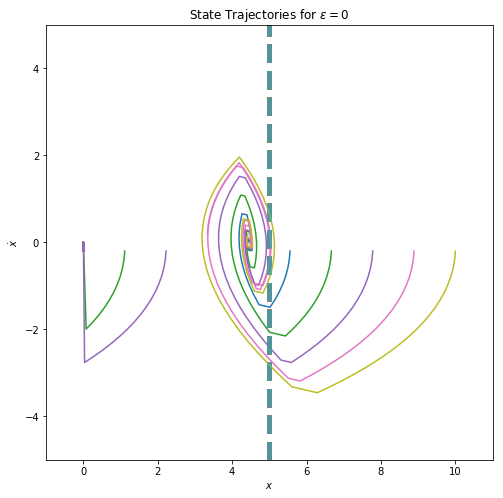

In [17]:
plt.figure(figsize=(8,8))
testIt(10, 100)